# Vehicle Recall Predictions

# Required Code

This is the code required to load the datasets we need

In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import re

data_path = 'data'
fields_path = 'fields'

# Written by: David
# Read and parse a file containing column names for a dataset.
# Returns a list of strings (the column names).
def load_column_names(columns_file_name):
    file = open(columns_file_name)
    column_names = []
    readingFields = False
    for line in file:
        if readingFields:
            if re.match('^[0-9]', line):
                split_line = line.split()
                column_names.append(split_line[1])
        elif line.startswith('Field#'):
            readingFields = True
    file.close()
    return column_names
#}

# Written by: David
# Load a dataest by its abbreviated names (ex: RCL).
def load_data_file(name, encoding):
    
    # Read the column names from a separate file.
    fields_file_name = fields_path + '/' + name + '.txt';
    names = load_column_names(fields_file_name)
    
    # Read the data from a CSV file.
    data_file_name = 'FLAT_' + name + '.txt';
    df = pd.read_csv(data_path + '/' + data_file_name,
                     delimiter='\t', header=None, encoding=encoding, names=names)
    
    return df
#}

# Written by: Christian
# Clean values in component descriptions
# Custom split function to pass to apply
def split(comp):
    if type(comp) != str:
        return ''
    return comp.split(':')[0]

print("done")

done


# Data cleaning

In [22]:
# Load the complaints dataset.
# Only use a subset of the data (because there is a lot of it)
cmpl_train_df = load_data_file('CMPL', encoding='iso-8859-1')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (15,22,26,32,33,34,35,36,38,39,40,41,42,43,44,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [23]:
# Written by: David
# Create list of the columns we will use.
# --Christian added DATEA as numerical column
key_cols = ['MAKETXT', 'MODELTXT', 'YEARTXT','COMPDESC']
cat_cols = ['DRIVE_TRAIN', 'FUEL_SYS', 'FUEL_TYPE', 'TRANS_TYPE']
bool_cols = ['CRASH', 'FIRE', 'POLICE_RPT_YN', 'ORIG_OWNER_YN', 'ANTI_BRAKES_YN', 'CRUISE_CONT_YN', 'MEDICAL_ATTN', 'VEHICLES_TOWED_YN']
numer_cols = bool_cols + ['INJURED', 'DEATHS', 'MILES', 'OCCURENCES', 'NUM_CYLS', 'VEH_SPEED','DATEA']
all_cols = key_cols + numer_cols + cat_cols

In [77]:
# Load the recall dataset
rcl_df = load_data_file('RCL', encoding='latin1');

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [78]:
# Written by: Christian
# Rename the component field in recalls so it matches complaints
recalled_set = rcl_df.rename(columns = {'COMPNAME':'COMPDESC'})

# Written by: David
# Create the set of vehicle types from the recalled dataset.
# Filter out rows with invalid make, model, or year.
# Also filter out any non-vehicles.
#--Christian - switched to all columns, doesn't take much longer and makes next part easier
recalled_set = recalled_set[(rcl_df['MAKETXT'] != 'UNKNOWN') &
                      (rcl_df['MODELTXT'] != 'UNKNOWN') &
                      (rcl_df['YEARTXT'] > 1900) &
                      (rcl_df['YEARTXT'] < 2020) &
                      (rcl_df['RCLTYPECD'] == 'V')][recalled_set.columns.values].copy()

# Written by: Christian
# Generalize the names of each component
recalled_set['COMPDESC'] = recalled_set['COMPDESC'].apply(split)

# Convert Date to a numeric value
recalled_set['RCDATE'] = pd.to_numeric(recalled_set['RCDATE'], errors='coerce')


# Written by: David
# Make the recalled set only have unique vehicle types,
# mostly for efficiency in the next step.
recalled_set = recalled_set[key_cols + ["RCDATE"]].groupby(key_cols)
print("done")

done


# Data Visualizations

In [ ]:
grouped_df.loc[grouped_df['RECALLED'] == True]

In [4]:
# Load the grouped data from file
grouped_df = pd.read_csv('fullData.txt', index_col=[0,1,2,3])

# Written by: David
# Create list of the columns we will use.
# --Christian added DATEA as numerical column
key_cols = ['MAKETXT', 'MODELTXT', 'YEARTXT','COMPDESC']
cat_cols = ['DRIVE_TRAIN', 'FUEL_SYS', 'FUEL_TYPE', 'TRANS_TYPE']
bool_cols = ['CRASH', 'FIRE', 'POLICE_RPT_YN', 'ORIG_OWNER_YN', 'ANTI_BRAKES_YN', 'CRUISE_CONT_YN', 'MEDICAL_ATTN', 'VEHICLES_TOWED_YN']
numer_cols = bool_cols + ['INJURED', 'DEATHS', 'MILES', 'OCCURENCES', 'NUM_CYLS', 'VEH_SPEED','DATEA']
all_cols = key_cols + numer_cols + cat_cols
numer_cols.append('COMPLAINTS')
all_cols.append('COMPLAINTS')

print('done')

done


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


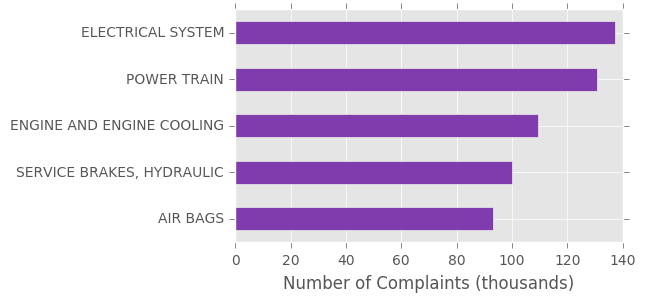

In [142]:
plt.style.use('ggplot')

plt.figure(figsize=(5,3))
(clean_train_df['COMPDESC'].value_counts() / 1000).nlargest(5).iloc[::-1].plot(kind='barh', color='#803cad')
#plt.title("Fig 5 - Failed Component Count")
plt.xlabel('Number of Complaints (thousands)', fontsize=12)
plt.gcf()

In [91]:
# Written by: Christian
# Rename the component field in recalls so it matches complaints
recalled_set = rcl_df.rename(columns = {'COMPNAME':'COMPDESC'})

# Written by: David
# Create the set of vehicle types from the recalled dataset.
# Filter out rows with invalid make, model, or year.
# Also filter out any non-vehicles.
#--Christian - switched to all columns, doesn't take much longer and makes next part easier
recalled_set = recalled_set[(rcl_df['MAKETXT'] != 'UNKNOWN') &
                      (rcl_df['MODELTXT'] != 'UNKNOWN') &
                      (rcl_df['YEARTXT'] > 1900) &
                      (rcl_df['YEARTXT'] < 2020) &
                      (rcl_df['RCLTYPECD'] == 'V')][recalled_set.columns.values].copy()

# Written by: Christian
# Generalize the names of each component
recalled_set['COMPDESC'] = recalled_set['COMPDESC'].apply(split)

# Convert Date to a numeric value
recalled_set['RCDATE'] = pd.to_numeric(recalled_set['RCDATE'], errors='coerce')

recalled_set['COMPDESC'].value_counts().nlargest(5)

EQUIPMENT                    17433
ELECTRICAL SYSTEM             7632
STEERING                      7195
SERVICE BRAKES, HYDRAULIC     6601
ENGINE AND ENGINE COOLING     5793
Name: COMPDESC, dtype: int64

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


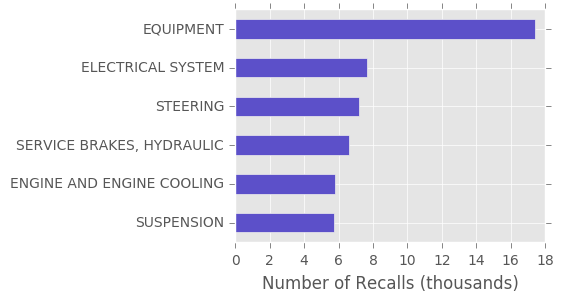

In [140]:
plt.style.use('ggplot')

plt.figure(figsize=(4,3))
(recalled_set['COMPDESC'].value_counts() / 1000).nlargest(6).iloc[::-1].plot(kind='barh', color='#5c50c9')
#plt.title("Fig 5 - Failed Component Count")
plt.xlabel('Number of Recalls (thousands)', fontsize=12)
plt.gcf()

In [94]:
cmpl_df = load_data_file('CMPL', encoding='iso-8859-1')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (15,22,26,32,33,34,35,36,38,39,40,41,42,43,44,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


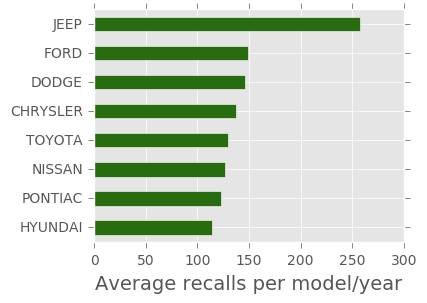

In [126]:
recallsPerVehicle = clean_train_df.groupby(['MAKETXT', 'MODELTXT', 'YEARTXT']).size()
#recallsPerVehicle.groupby(['MAKETXT'])
avgRecallsPerMake = recallsPerVehicle.groupby(level=[0]).mean()

plt.figure(figsize=(4,3))
avgRecallsPerMake.nlargest(8).iloc[::-1].plot(kind='barh', color='#276d10')
#plt.title("Fig 5 - Failed Component Count")
plt.xlabel('Average recalls per model/year', fontsize=12)
plt.ylabel('')
plt.gcf()

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


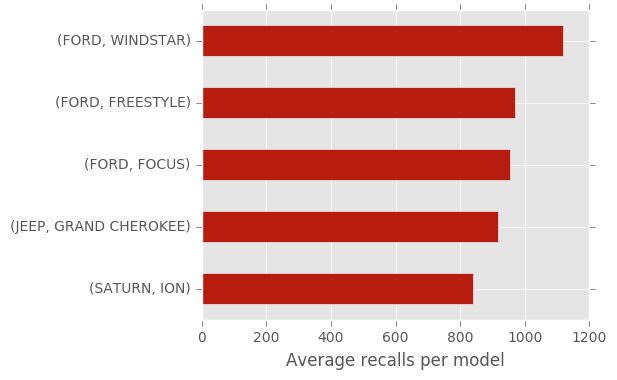

In [141]:
recallsPerVehicle = clean_train_df.groupby(['MAKETXT', 'MODELTXT', 'YEARTXT']).size()
#recallsPerVehicle.groupby(['MAKETXT'])
recallsPerModel = recallsPerVehicle.groupby(level=[0, 1]).mean()

plt.figure(figsize=(5,4))
recallsPerModel.nlargest(5).iloc[::-1].plot(kind='barh', color='#b71c0e')
##plt.title("Fig 5 - Failed Component Count")
plt.xlabel('Average recalls per model', fontsize=12)
plt.ylabel('')
plt.gcf()

In [144]:
print(grouped_df[grouped_df['RECALLED'] == True]['COMPLAINTS'].mean())
print(grouped_df[grouped_df['RECALLED'] == False]['COMPLAINTS'].mean())

35.683433433433436
7.430649079509501


In [145]:
grouped_df.loc[('FORD', 'FUSION', 2006, 'ELECTRICAL SYSTEM')]

DRIVE_TRAIN                FWD
FUEL_SYS                    FI
FUEL_TYPE                   GS
TRANS_TYPE                AUTO
CRASH                0.0166667
FIRE                 0.0333333
POLICE_RPT_YN        0.0169492
ORIG_OWNER_YN        0.0338983
ANTI_BRAKES_YN       0.0338983
CRUISE_CONT_YN       0.0338983
MEDICAL_ATTN                 0
VEHICLES_TOWED_YN    0.0833333
INJURED                      0
DEATHS                       0
MILES                  85022.6
OCCURENCES             1.04762
NUM_CYLS                   5.4
VEH_SPEED              27.4419
DATEA                 20123548
COMPLAINTS                  60
RECALLED                 False
RECALLED_1YR             False
RECALLED_3YR             False
RECALLED_5YR             False
Name: (FORD, FUSION, 2006.0, ELECTRICAL SYSTEM), dtype: object